#### Sociology 128D: Mining Culture Through Text Data: Introduction to Social Data Science

# Notebook 2: Manipulating, Quantifying, and Visualizating Text Data

#### A quick note about this notebook versus subsequent notebooks

As a reminder, this class is meant to be a bit like a series of workshops, many of which could be self-contained. If you feel a bit lost amid all the code, that's okay--and if this all strikes you as incredibly basic, that's okay, too! Subsequent notebooks will use various methods to analyze a corpus in a way that can produce sociologically-interesting knowledge. These notebooks will be accessible even if you don't feel confident in your ability to follow the code because the focus won't be on the coding. The notebooks should also be interesting even if the code seems pretty basic to you because we'll be looking at applications to social research.

#### A quick note about this notebook

In this notebook, we'll begin to look at how to use libraries like `pandas` to manage and manipulate text. We'll also build toward different ways of quantifying information about documents and visualizing the results.

This is only the second notebook, and this is all preliminary material. From here, we'll move on to measures like TF-IDF that can be used for information retrieval (e.g., search engines) and measuring document similarity, which has all sorts of applications in the social sciences. TF-IDF is also a jumping off point for other measures we'll consider, including dense vector representations.

Let's have an initial go at using `pandas` with a dataset of tweets from January 6, 2021. You can download the dataset from Kaggle at [this link](https://www.kaggle.com/mrmorj/capitol-riot-tweets). Just unzip/extract the archive and place the CSV in the same directory as this notebook (or edit the `f = "..."` line in the following cell to include the file path).

In [1]:
import pandas as pd

f = "tweets_2021-01-06.csv"
df = pd.read_csv(f)

`.head()` shows the first few rows. You can supply a number to see more or fewer.

In [2]:
df.head()

,tweet_id,text,query,user_id,user_name,follower_count,user_tweet_count,likes,retweets,location_name,longitude,latitude,user_location,date
0,1346863072435179520,we can adjust by population to get crude exces...,death rates,1101487206840057856,nick stripe,12936,1577,255,108,NaN,NaN,NaN,NaN,2021-01-06
1,1346817043232919555,turning to labour or remainers like what would...,death rates,234694571,femi,290982,75187,877,116,NaN,NaN,NaN,NaN,2021-01-06
2,1346862193451692034,numbers of deaths are affected by population s...,death rates,1101487206840057856,nick stripe,12936,1577,213,75,NaN,NaN,NaN,NaN,2021-01-06
3,1346969461190848516,here is a list of governors who preside over s...,death rates,1346952467003568129,NaN,2,120,0,7612,NaN,NaN,NaN,NaN,2021-01-06
4,1346969317569687554,convince me with facts on death rates and infe...,death rates,885891622919184384,NaN,11552,36252,2,0,NaN,NaN,NaN,NaN,2021-01-06


`.columns` lists the column names.

In [3]:
df.columns

Index(['tweet_id', 'text', 'query', 'user_id', 'user_name', 'follower_count',
       'user_tweet_count', 'likes', 'retweets', 'location_name', 'longitude',
       'latitude', 'user_location', 'date'],
      dtype='object')

`.shape` shows the "shape" of the dataframe, meaning the number of rows followed by the number of columns. The following line of code shows there are 82,309 tweets (rows) and 14 columns.

In [4]:
df.shape

(82309, 14)

We can subset the dataset by column by supplying a list of the columns we want.

In [5]:
cols_to_keep = ["tweet_id", "text", "query", "follower_count", "likes", "retweets"]

In [6]:
df = df[cols_to_keep]

In [7]:
df.head()

,tweet_id,text,query,follower_count,likes,retweets
0,1346863072435179520,we can adjust by population to get crude exces...,death rates,12936,255,108
1,1346817043232919555,turning to labour or remainers like what would...,death rates,290982,877,116
2,1346862193451692034,numbers of deaths are affected by population s...,death rates,12936,213,75
3,1346969461190848516,here is a list of governors who preside over s...,death rates,2,0,7612
4,1346969317569687554,convince me with facts on death rates and infe...,death rates,11552,2,0


We can also subset the **rows** using criteria like specific values for specific columns.

In [8]:
df[df["tweet_id"]==1346863072435179520]

,tweet_id,text,query,follower_count,likes,retweets
0,1346863072435179520,we can adjust by population to get crude exces...,death rates,12936,255,108


In [9]:
df[df["likes"] > 100000]

,tweet_id,text,query,follower_count,likes,retweets
495,1346819123716780033,hello its a new day whos ready to push ready t...,covid,11520874,232983,19519
32525,1346879246682230791,please dont clap us just wear a mask wash your...,lockdown,169089,105341,24437
58954,1346929533774159876,i call on president trump to go on national te...,president,23874901,1070310,107895
58955,1346960922615685121,the man directly responsible for the chaos of ...,president,14386977,582501,114421
58956,1346916179584061440,if you dont impeach and remove a president for...,president,543473,546557,98705
76469,1346879246682230791,please dont clap us just wear a mask wash your...,mask,169565,105342,24440


In [10]:
df[df["query"]=="mask"]

,tweet_id,text,query,follower_count,likes,retweets
76469,1346879246682230791,please dont clap us just wear a mask wash your...,mask,169565,105342,24440
76470,1346825411125268480,it went from just wear the mask to this in a h...,mask,1129617,8335,2892
76471,1346913081109082113,there are moments when you can tell a lot abou...,mask,210885,19422,4673
76472,1346969797595189255,left protests alright remember wear a mask to ...,mask,299,0,491
76473,1346969796156547072,i thought maybe if you had your mask on the ma...,mask,7,1,0
...,...,...,...,...,...,...
82304,1346815324948086787,chocolate oda thaan suthuvvar polaby the way w...,mask,79,2,0
82305,1346815315309699072,this could be us but yall dont wanna go on loc...,mask,647,0,6589
82306,1346815315234185221,covid 19 grey black dust mask activated antipo...,mask,459,0,0
82307,1346815313204154368,imagine if the energy people put into complain...,mask,3272,20,4


We can also combine criteria to select rows.

In [12]:
df[(df["query"]=="mask") & (df["retweets"]==0)]

,tweet_id,text,query,follower_count,likes,retweets
76473,1346969796156547072,i thought maybe if you had your mask on the ma...,mask,7,1,0
76474,1346969795011506177,not in a panera girl and not a mask for miles,mask,234,1,0
76475,1346969794684342274,imagine the cops reacting to election protests...,mask,50,1,0
76476,1346969789453848576,i hope her gas mask is one size too small,mask,848,0,0
76477,1346969787201703937,that god damn money can be spent helping canad...,mask,7,0,0
...,...,...,...,...,...,...
82295,1346815343323353088,ah i wanted to ask about that if its not too i...,mask,297,0,0
82296,1346815342891339777,hahahah my nenek cute or wat she say she so co...,mask,20,0,0
82299,1346815338319654913,im sitting here scrolling twitter getting my m...,mask,240,0,0
82304,1346815324948086787,chocolate oda thaan suthuvvar polaby the way w...,mask,79,2,0


`pandas` has a lot of built-in functionality for manipulating, summarizing, and plotting data. Let's look at how we can calculate and plot the counts and means of different variables.

In [13]:
df[["query", "tweet_id"]].groupby("query").count()

,tweet_id
query,
coronavirus,2822
covid,5843
death rates,495
economy,5836
jobs,5843
lockdown,5847
mask,5840
pandemic,5847
president,5842


<AxesSubplot:xlabel='query'>

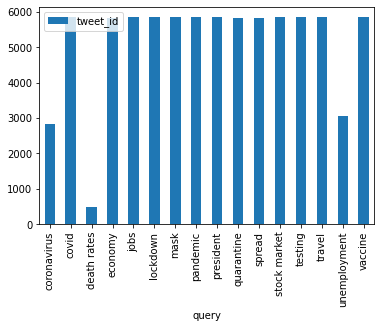

In [14]:
df[["query", "tweet_id"]].groupby("query").count().plot.bar()

In [15]:
df[["query", "retweets"]].groupby("query").mean()

,retweets
query,
coronavirus,275.980156
covid,1722.420503
death rates,1435.236364
economy,371.381254
jobs,7573.602773
lockdown,1165.315546
mask,2572.072774
pandemic,3899.579271
president,5039.815817


<AxesSubplot:xlabel='query'>

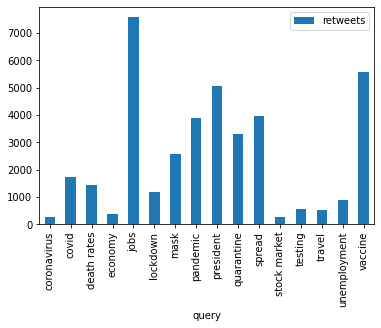

In [16]:
df[["query", "retweets"]].groupby("query").mean().plot.bar()

Although we can use methods like `str.contains()` or even `if` statements like `if "str" in string: ...` when we're operating on strings, like below, sometimes we need to find other ways to interact with strings in pandas dataframes.

In the following cell, there should be a `TypeError` when the we check whether the string "capitol" is in the "text" column of a row that apparently has a float instead. This is actually a missing value.

In [17]:
COUNT = 0

for idx, row in df.iterrows():
    if "capitol" in row["text"]:
        COUNT += 1
        
print(COUNT)

TypeError: argument of type 'float' is not iterable

In [18]:
COUNT = 0

for idx, row in df.iterrows():
    try:
        if "capitol" in row["text"]:
            COUNT += 1
    except TypeError:
        print(f"Problematic type and value: {type(row['text'])}, {row['text']}")
        
print(COUNT)

Problematic type and value: <class 'float'>, nan
1750


We can drop the row with the missing value. The [`.dropna()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html?highlight=dropna) can be applied to the entire row, but we may not care if data are missing for a variable that is not important to our analysis. We can use the `subset` argument to specify the columns we want `.dropna()` to look at. The following line means that we will drop any rows with missing data for the "text" column. We lose only one row this way.

In [19]:
df = df.dropna(subset = ["text"])

In [20]:
df.shape

(82308, 6)

Now we can count the number of tweets containing the string "capitol" at least once. 

In [21]:
COUNT = 0

for idx, row in df.iterrows():
    if "capitol" in row["text"]:
        COUNT += 1
        
print(COUNT)

1750


We'll need to take a quick detour to think about [lambda functions](https://www.geeksforgeeks.org/python-lambda-anonymous-functions-filter-map-reduce/), which are functions that we define in just one line of code. As we'll see in a moment, these are useful for operating on columns in pandas dataframes. Let's also look at [list comprehensions](https://www.geeksforgeeks.org/python-list-comprehension/), which allow us to execute a loop in just one line of code.

The for loop below appends the values 0-9 to a list called `integers`. In the next cell, we use a list comprehension to do the same thing, and both print statements match. List comprehensions can be faster and actually quite flexible, but they can also end up being difficult to read.

In [22]:
integers = []

for i in range(10):
    integers.append(i)
    
print(integers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [23]:
integers = [i for i in range(10)]

print(integers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In the next two cells, we see a function defined in a relatively conventional way. This function takes in the variable `x`, which should be an integer, and multiplies it by 10, returning another integer.

The second cell defines an equivalent function in only one line. `lambda x:` means we're about to do something to `x`, for any value of `x` that is supplied. The part after the colon is what we do to `x`, which in this case is multiplying it by 10.

In [24]:
def multiply_by_ten(x: int) -> int:
    return x * 10

integers = [i for i in range(10)]
integers = [multiply_by_ten(x) for x in integers]

print(integers)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


In [26]:
integers = [i for i in range(10)]

print(f"Original list: {integers}")

multiply_by_ten = lambda x: x*10

integers = [multiply_by_ten(x) for x in integers]

print(f"After applying lambda function: {integers}")

Original list: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
After applying lambda function: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


We'll use those in a moment. Next, let's look at how we can iterate through a pandas column. We'll look at the "text" column as a list, then use a for loop to calculate the wordcounts. Then we'll define a function in the traditional way and apply it to the "text" column in the pandas dataframe directly using the `.apply()` method. Then we'll do the same thing using a lambda function instead of a function we've defined the conventional way. Finally, we'll show that these provide the same results.

In [27]:
df["text"].tolist()

['we can adjust by population to get crude excess death rates 2020 will also be the highest since 1940 even with measures taken to limit covid spread 2020 will still top 1951 the year of a major flu epidemic without all our efforts 2020 could have been much worse 911',
 'turning to labour or remainers like what would you do different while sat on one of the worst economic recessions amp death rates in the g7 its like driving a car off a cliff amp while youre falling offering the wheel to the guy in the passenger seat go on you fix it',
 'numbers of deaths are affected by population size we can also consider death rates as a proportion of the population crude death rates are shown below all improvements in the first decade of this century will be reversed this year spanish flu did the same in 1918 611',
 'here is a list of governors who preside over states with higher deathpermillion rates than fls ron desantis whom the media have anointed public enemy 1 1 murphy d 2 cuomo d 3 baker r 4

In [28]:
tweets = []

for tweet in df["text"].tolist():
    tweets.append(tweet)
    
for i in range(5):
    print(tweets[i])

we can adjust by population to get crude excess death rates 2020 will also be the highest since 1940 even with measures taken to limit covid spread 2020 will still top 1951 the year of a major flu epidemic without all our efforts 2020 could have been much worse 911
turning to labour or remainers like what would you do different while sat on one of the worst economic recessions amp death rates in the g7 its like driving a car off a cliff amp while youre falling offering the wheel to the guy in the passenger seat go on you fix it
numbers of deaths are affected by population size we can also consider death rates as a proportion of the population crude death rates are shown below all improvements in the first decade of this century will be reversed this year spanish flu did the same in 1918 611
here is a list of governors who preside over states with higher deathpermillion rates than fls ron desantis whom the media have anointed public enemy 1 1 murphy d 2 cuomo d 3 baker r 4 raimondo d 5 

In [29]:
for i in range(5):
    print(tweets[i].split())

['we', 'can', 'adjust', 'by', 'population', 'to', 'get', 'crude', 'excess', 'death', 'rates', '2020', 'will', 'also', 'be', 'the', 'highest', 'since', '1940', 'even', 'with', 'measures', 'taken', 'to', 'limit', 'covid', 'spread', '2020', 'will', 'still', 'top', '1951', 'the', 'year', 'of', 'a', 'major', 'flu', 'epidemic', 'without', 'all', 'our', 'efforts', '2020', 'could', 'have', 'been', 'much', 'worse', '911']
['turning', 'to', 'labour', 'or', 'remainers', 'like', 'what', 'would', 'you', 'do', 'different', 'while', 'sat', 'on', 'one', 'of', 'the', 'worst', 'economic', 'recessions', 'amp', 'death', 'rates', 'in', 'the', 'g7', 'its', 'like', 'driving', 'a', 'car', 'off', 'a', 'cliff', 'amp', 'while', 'youre', 'falling', 'offering', 'the', 'wheel', 'to', 'the', 'guy', 'in', 'the', 'passenger', 'seat', 'go', 'on', 'you', 'fix', 'it']
['numbers', 'of', 'deaths', 'are', 'affected', 'by', 'population', 'size', 'we', 'can', 'also', 'consider', 'death', 'rates', 'as', 'a', 'proportion', 'of'

In [30]:
wordcounts = []

for tweet in df["text"].tolist():
    wordcount = len(tweet.split())
    wordcounts.append(wordcount)

[pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) and [seaborn](https://seaborn.pydata.org/) will be staples of data visualization in the course.

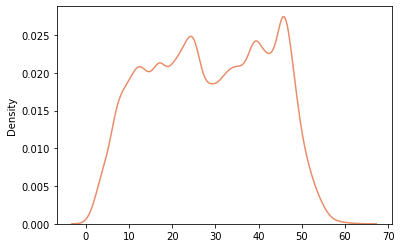

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("flare")

sns.kdeplot(wordcounts)
plt.show()

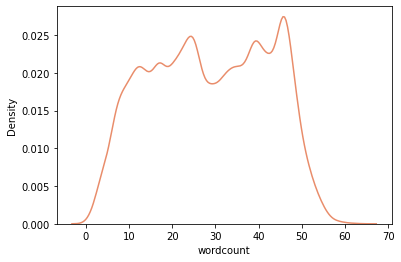

In [32]:
def wordcount(word: str) -> int:
    return len(word.split())


df["wordcount"] = df["text"].apply(wordcount)

sns.kdeplot("wordcount", data = df)
plt.show()

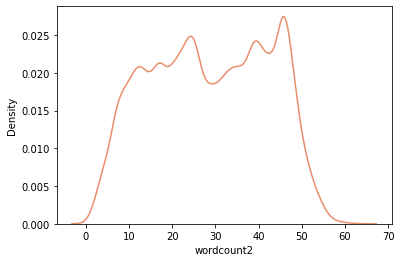

In [33]:
df["wordcount2"] = df["text"].apply(lambda x: len(x.split()))

sns.kdeplot("wordcount2", data = df)
plt.show()

Finally, we can superimpose these distributions to show that they are the same (though we can do this other ways). We should just see one distribution in this case because they are being plotted over one another. If these were different variables, we would see multiple distributions in this plot, as we'll see below.

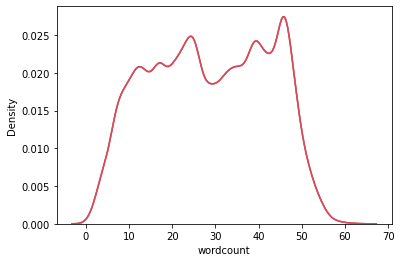

In [34]:
sns.kdeplot("wordcount", data = df)
sns.kdeplot("wordcount2", data = df)
sns.kdeplot(wordcounts)
plt.show()

The [`collections` module](https://docs.python.org/3/library/collections.html) provides a lot useful methods for manipulating data. We will use `defaultdict()` a lot later on, for example. Right now, let's take a look at `Counter()` . Counter provides an object like a dictionary with the elements of an iterable (like a list) as keys and the frequencies as values. In the example below, we get a mapping of values from the "query" column (keys) to their frequencies in the dataframe (values), or the number of rows with those values.

In [35]:
from collections import Counter

c = Counter(df["query"])
print(type(c))
print(c.keys())

<class 'collections.Counter'>
dict_keys(['death rates', 'covid', 'travel', 'coronavirus', 'stock market', 'pandemic', 'economy', 'lockdown', 'jobs', 'testing', 'unemployment', 'vaccine', 'president', 'spread', 'quarantine', 'mask'])


In [36]:
c

Counter({'death rates': 495,
         'covid': 5843,
         'travel': 5839,
         'coronavirus': 2822,
         'stock market': 5843,
         'pandemic': 5847,
         'economy': 5836,
         'lockdown': 5847,
         'jobs': 5843,
         'testing': 5847,
         'unemployment': 3045,
         'vaccine': 5847,
         'president': 5842,
         'spread': 5837,
         'quarantine': 5836,
         'mask': 5839})

Let's take a look at tweets from a subset of these queries. We'll subset the dataframe a bit like we did above, this time using the `.isin()` method.

The code in the second cell, `df[df["query"].isin(query_subset)]`, will return a dataframe matching that criterion. What's going on with this way of subsetting the data, though?

As we can see in the third cell, if we execute just the code used to subset the data, `df["query"].isin(query_subset)`, we get a pandas Series (like a list) of `True` and `False` of the same length as the number of rows in the dataframe. When we apply that condition to the dataframe to subset it in the second cell (`df[df["query"].isin(query_subset)]`), we are return the rows where that condition is `True`.

In [37]:
query_subset = ["lockdown", "mask", "quarantine", "travel"]

In [39]:
df[df["query"].isin(query_subset)]

,tweet_id,text,query,follower_count,likes,retweets,wordcount,wordcount2
6338,1346919848727638017,if time travel isnt possible then explain how ...,travel,235998,4731,697,22,22
6339,1346912068939743236,disappointed to hear of delays in arrival to c...,travel,282666,3801,1433,44,44
6340,1346919263680958470,soooo is every other country in the world goin...,travel,3454856,3139,326,23,23
6341,1346969796605337606,travel leisure magazine acquired by wyndham de...,travel,86158,2,3,10,10
6342,1346969792910131200,87 of canadians support greater restrictions o...,travel,39,0,411,32,32
...,...,...,...,...,...,...,...,...
82304,1346815324948086787,chocolate oda thaan suthuvvar polaby the way w...,mask,79,2,0,11,11
82305,1346815315309699072,this could be us but yall dont wanna go on loc...,mask,647,0,6589,23,23
82306,1346815315234185221,covid 19 grey black dust mask activated antipo...,mask,459,0,0,16,16
82307,1346815313204154368,imagine if the energy people put into complain...,mask,3272,20,4,46,46


In [40]:
df["query"].isin(query_subset)

0        False
1        False
2        False
3        False
4        False
         ...  
82304     True
82305     True
82306     True
82307     True
82308     True
Name: query, Length: 82308, dtype: bool

In [41]:
type(df["query"].isin(query_subset))

pandas.core.series.Series

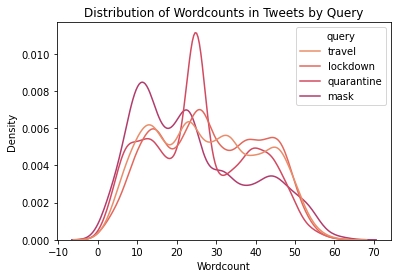

In [42]:
sns.kdeplot("wordcount", data = df[df["query"].isin(query_subset)], hue = "query")
plt.xlabel("Wordcount")
plt.title("Distribution of Wordcounts in Tweets by Query")
plt.show()

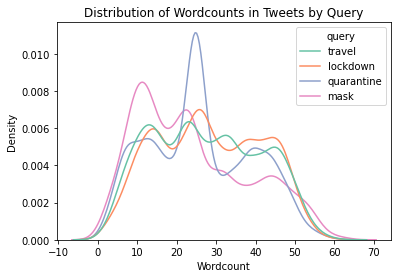

In [43]:
sns.set_palette("Set2")

sns.kdeplot("wordcount", data = df[df["query"].isin(query_subset)], hue = "query")
plt.xlabel("Wordcount")
plt.title("Distribution of Wordcounts in Tweets by Query")
plt.show()

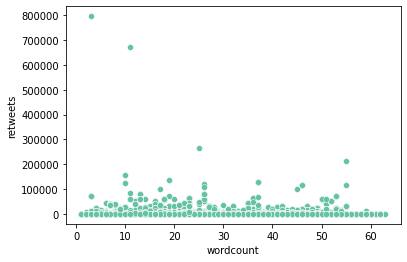

In [44]:
sns.scatterplot(x = "wordcount", y = "retweets", data = df)
plt.show()

Now let's subset the data so we can look at tweets containing the string "capitol" at least once. We'll define a function, `contains_capitol`, that takes in a string and returns `True` if the string contains "capitol" and `False` if it doesn't.

In [48]:
def contains_capitol(text: str) -> bool:
    if "capitol" in text:
        return True
    return False

test_string1 = "this string contains capitol"
test_string2 = "this string does not"

print(contains_capitol(test_string1))
print(contains_capitol(test_string2))

True
False


Now we'll create a variable using this function.

In [49]:
df["contains_capitol"] = df["text"].apply(contains_capitol)

In [50]:
df

,tweet_id,text,query,follower_count,likes,retweets,wordcount,wordcount2,contains_capitol
0,1346863072435179520,we can adjust by population to get crude exces...,death rates,12936,255,108,50,50,False
1,1346817043232919555,turning to labour or remainers like what would...,death rates,290982,877,116,53,53,False
2,1346862193451692034,numbers of deaths are affected by population s...,death rates,12936,213,75,48,48,False
3,1346969461190848516,here is a list of governors who preside over s...,death rates,2,0,7612,50,50,False
4,1346969317569687554,convince me with facts on death rates and infe...,death rates,11552,2,0,10,10,False
...,...,...,...,...,...,...,...,...,...
82304,1346815324948086787,chocolate oda thaan suthuvvar polaby the way w...,mask,79,2,0,11,11,False
82305,1346815315309699072,this could be us but yall dont wanna go on loc...,mask,647,0,6589,23,23,False
82306,1346815315234185221,covid 19 grey black dust mask activated antipo...,mask,459,0,0,16,16,False
82307,1346815313204154368,imagine if the energy people put into complain...,mask,3272,20,4,46,46,False


In [51]:
Counter(df["contains_capitol"])

Counter({False: 80558, True: 1750})

Finally, let's subset the rows to keep only the tweets containing "capitol" (in the next cell) and then drop our new column and the duplicate wordcount column.

In [53]:
df = df[df["contains_capitol"]] # we don't need to specify "== True" because Python assumes this

In [54]:
df = df.drop(["wordcount2", "contains_capitol"], axis = 1)

In [55]:
df

,tweet_id,text,query,follower_count,likes,retweets,wordcount
6338,1346919848727638017,if time travel isnt possible then explain how ...,travel,235998,4731,697,22
6347,1346969766695641088,breaking via wh press pool press pool reporter...,travel,826,0,0,46
6454,1346911768971456512,look blm has nothing to do with the hate displ...,travel,68,0,0,49
6588,1346911314656993290,only a true patriot would travel to washington...,travel,883,1,0,15
6609,1346911212676681733,amazing that refuses to answer these basic que...,travel,188,0,1426,46
...,...,...,...,...,...,...,...
64795,1346915988038627338,call me oldfashioned but when armed insurgents...,president,17,0,30050,23
73549,1346836015202381828,the virus told me last night that he plans to ...,quarantine,1342,0,2,40
75926,1346819139466354688,the virus told me last night that he plans to ...,quarantine,1601,42,2,40
77182,1346824238246801408,three protests seem to be converging at the st...,mask,5041,1,0,17


Now let's take a quick look at some properties of the wordcounts of this subset of tweets. We can control the precision when we print floats, including when we use [f-strings](https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/), like below. `.2f` restricts to the output to two digits after the decimal.

In [56]:
print(f"Average wordcount: {df['wordcount'].mean()}")

Average wordcount: 32.31657142857143


In [57]:
print(f"Average wordcount: {df['wordcount'].mean():.2f}")
print(f"Minimum wordcount: {df['wordcount'].min()}")
print(f"Maximum wordcount: {df['wordcount'].max()}")
print(f"Standard deviation: {df['wordcount'].std()}")

Average wordcount: 32.32
Minimum wordcount: 8
Maximum wordcount: 55
Standard deviation: 10.537705433737242


A quick note on calculating variances and standard deviations in Python and other languages:

[The `std()` method from pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html) divides by N - 1. This is similar to the default for R and Stata.

[The `std()` method from numpy](https://numpy.org/doc/stable/reference/generated/numpy.std.html) divides by N. You can change this by using the `ddof` argument in either method (setting it to 0 or 1).

If you're curious, see [here](https://en.wikipedia.org/wiki/Bessel%27s_correction) and [here](https://math.stackexchange.com/questions/2060400/why-do-you-use-n-1-in-standard-error-of-the-mean-but-n-in-hypothesis-testing) for more on why we often divide by N - 1 for the sample variance (and thus standard deviation), rather than by N (as we do for the population).

In [58]:
integers_as_strings = [str(i) for i in range(10)]
print(f"As a list: {integers_as_strings}")

integers_as_strings = " ".join(integers_as_strings)
print(f"As a single string: {integers_as_strings}")

As a list: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
As a single string: 0 1 2 3 4 5 6 7 8 9


Now let's take a look at term frequency and document frequency. We'll use these to build up to powerful ways to compare documents. One application is finding similar documents (e.g., in search engines). We'll see later in the quarter how these can also be used to compare things like online communities like subreddits.

To get the frequencies of all the words in the corpus, we can quickly combine all of the tweets (the "text" column) using the `.join()` method, implicitly treating the column as a list of tweets. If we look at a slice of the document (by characters), we can see that we've just merged all of the tweets together, joining them with a space.

In [59]:
all_text = " ".join(df["text"])

In [60]:
all_text[:1000]

'if time travel isnt possible then explain how i just woke up to people storming the capitol while waiving the confederate flag breaking via wh press pool press pool reporter says nothing new at the white house and no word on when we will have a lid wrt uscapitol protest a travel photo lid would end the day in terms of journalists potential interaction with trump capitol capitolhill look blm has nothing to do with the hate displayed at the capitol blm is for equality for minorities we cant stand trump and his racism what makes you think we would travel and chance being locked up for a racist person you sound ignorant we are celebrating georgia only a true patriot would travel to washington dc to urinate on the us capitol amazing that refuses to answer these basic questions about how it is that 6 days after announcing she was positive for covid with symptoms she was somehow able to travel to wisconsin to dc to enter the capitol and deliver pelosi a needed vote for speaker enough is enou

If we `split` all of this on whitespace, we get the individual *tokens*, or instances of words. If we use `Counter`, this returns the number of times each `type` (*unique* token) occurs. See [here](https://en.wikipedia.org/wiki/Type%E2%80%93token_distinction) for the type-token distinction. Each word is a token, but it is also an instance of a unique type.

In [61]:
word_frequencies = dict(Counter(all_text.split()))

types_and_counts = sorted(list(word_frequencies.items()), reverse = True, key = lambda x: x[1])
print(types_and_counts[:100])

[('the', 5153), ('of', 2167), ('capitol', 2107), ('president', 1550), ('to', 1503), ('a', 1274), ('and', 1210), ('is', 835), ('in', 832), ('on', 611), ('states', 582), ('united', 580), ('us', 559), ('at', 542), ('are', 530), ('this', 526), ('an', 476), ('i', 455), ('has', 449), ('be', 449), ('trump', 427), ('he', 403), ('not', 347), ('supporters', 343), ('there', 336), ('building', 325), ('by', 324), ('now', 310), ('that', 297), ('as', 293), ('for', 290), ('incited', 285), ('it', 284), ('with', 274), ('coup', 274), ('my', 266), ('im', 256), ('our', 251), ('police', 250), ('election', 243), ('have', 241), ('protest', 241), ('you', 234), ('me', 234), ('call', 234), ('people', 225), ('dont', 222), ('his', 217), ('today', 214), ('them', 202), ('violence', 201), ('will', 200), ('breach', 188), ('riot', 185), ('dc', 180), ('wild', 180), ('been', 172), ('stormed', 171), ('what', 167), ('but', 164), ('protestors', 164), ('right', 162), ('january', 154), ('certification', 154), ('flags', 153), 

Now let's examine the distribution of word frequencies. The code below "unzips" the types and frequencies into lists that stay in the same order. `types_` will be a list of the types in the original order, and `token_counts` will be a list of the frequencies in the same order. The first element in `types_` will be the most frequent, while the last will be the least frequent.

In [62]:
types_, token_counts = zip(*types_and_counts)

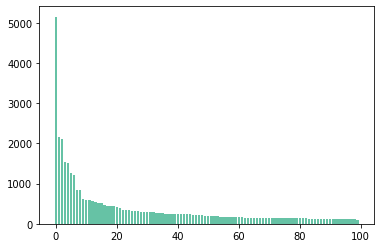

In [63]:
plt.bar(x = range(100), height = token_counts[:100])
plt.show()

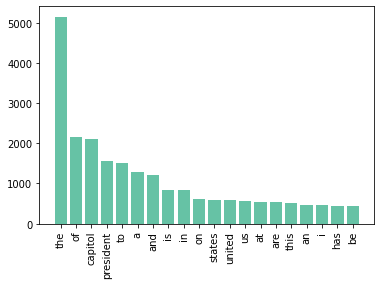

In [64]:
plt.bar(x = types_[:20], height = token_counts[:20])
plt.xticks(rotation = 90)
plt.show()

Linguists will sometimes refer to [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) when discussing the distribution of words. You'll typically see that a few words are extremely common and most are extremely rare. Put one way, there is a negative correlation between the rank of a word (where 1 = most frequent) and its frequency.

We'll talk about "stop words" more soon; these are extremely frequent words which are generally seen to have little semantic information (e.g., "the" or "to"). Looking at the distribution of words will also be relevant later when we start to look at tools like topic modeling, where some algorithms make assumptions about how words are distributed.

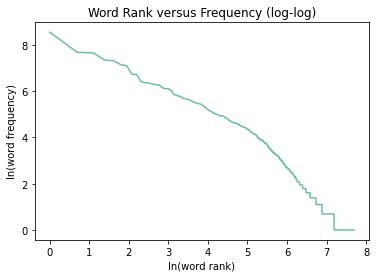

In [65]:
import numpy as np

log_rank = np.log(range(1, len(token_counts)+1))
log_frequencies = np.log(token_counts)

plt.plot(log_rank, log_frequencies)
plt.ylabel("ln(word frequency)")
plt.xlabel("ln(word rank)")
plt.title("Word Rank versus Frequency (log-log)")
plt.show()

In [66]:
print(types_[:100])

('the', 'of', 'capitol', 'president', 'to', 'a', 'and', 'is', 'in', 'on', 'states', 'united', 'us', 'at', 'are', 'this', 'an', 'i', 'has', 'be', 'trump', 'he', 'not', 'supporters', 'there', 'building', 'by', 'now', 'that', 'as', 'for', 'incited', 'it', 'with', 'coup', 'my', 'im', 'our', 'police', 'election', 'have', 'protest', 'you', 'me', 'call', 'people', 'dont', 'his', 'today', 'them', 'violence', 'will', 'breach', 'riot', 'dc', 'wild', 'been', 'stormed', 'what', 'but', 'protestors', 'right', 'january', 'certification', 'flags', 'attempted', 'when', 'mob', 'storm', 'tweeted', 'can', 'was', 'country', 'responsible', 'appalling', 'storming', 'big', '6th', 'white', 'december', '19', 'him', 'tell', 'safe', 'if', 'own', 'its', 'armed', 'were', 'house', 'place', 'words', 'sheltering', 'into', 'where', 'congress', 'attempt', 'saw', 'violent', 'id')


In [67]:
print(types_[-100:])

('shame', 'disabling', 'walking', 'assaulted', 'constitutionally', 'mandated', 'proceeding', 'shut', 'intern', 'procedure', 'dais', 'yelled', 'won', 'dismissed', 'kabuki', 'dance', 'positioning', 'meaning', 'cost', 'figuratively', 'governors', 'intentionally', 'fames', 'bs', 'fecklessly', 'quiet', 'nonstop', 'year', '13', 'direction', 'conservative', 'bombs', 'magaiscancelled', 'complacency', 'meant', 'fail', 'surprise', 'escalate', 'breaching', 'securities', 'partyfor', 'gonna', 'foresee', 'reins', 'everybody', 'likes', 'enemies', 'disrupts', 'fundamental', 'system', 'does', 'dispatch', 'resources', 'mass', 'arrests', 'processes', 'aiding', 'founding', 'fathers', 'motorcade', 'trumty', 'dumbty', 'failing', 'job', 'pry', 'trumptards', 'smashing', 'finally', 'jake', 'tapper', 'helped', 'ok', 'argue', 'peace', 'hoped', 'lifetime', 'vets', 'gets', 'larger', 'plan', 'comes', 'huge', 'economic', 'corruption', 'unfair', 'treatments', 'minoritiesbut', 'blank', 'dhs', 'justroam', 'thingstheyre

In [68]:
print(len(types_))

2207


In [69]:
print(sum(token_counts))

56554


Now we have a dictionary, `word_frequencies`, that maps each type (unique word) to its frequency in the corpus. Let's make a dictionary mapping types to their *document frequency*, or the number of documents in which they occur.

In [70]:
def set_of_types(document: str) -> str:
    return " ".join(list(set(document.split())))

In [71]:
s = "this is a string that repeats some words, like string and words and some"

Counter(s.split()) # three types occur twice

Counter({'this': 1,
         'is': 1,
         'a': 1,
         'string': 2,
         'that': 1,
         'repeats': 1,
         'some': 2,
         'words,': 1,
         'like': 1,
         'and': 2,
         'words': 1})

In [72]:
s2 = set_of_types(s)

Counter(s2.split()) # each type occurs only once

Counter({'repeats': 1,
         'some': 1,
         'string': 1,
         'is': 1,
         'that': 1,
         'a': 1,
         'and': 1,
         'words,': 1,
         'words': 1,
         'like': 1,
         'this': 1})

If we applly this function to each document, each row will have a string containing the types in the original tweet, but each will appear only once. If we count up the occurrences of each word in this column, it's the same as going through each row and checking whether the type occurs at least once. In other words, this helps us count the number of documents in which each word occurs. There are other ways to do this, of course, and later we'll see that we can use libraries like `scikit-learn` to do this more quickly.

In [74]:
df["types"] = df["text"].apply(set_of_types)

In [75]:
df

,tweet_id,text,query,follower_count,likes,retweets,wordcount,types
6338,1346919848727638017,if time travel isnt possible then explain how ...,travel,235998,4731,697,22,just if waiving to up travel how the capitol i...
6347,1346969766695641088,breaking via wh press pool press pool reporter...,travel,826,0,0,46,house new day potential interaction lid protes...
6454,1346911768971456512,look blm has nothing to do with the hate displ...,travel,68,0,0,49,look what cant makes racism to travel up stand...
6588,1346911314656993290,only a true patriot would travel to washington...,travel,883,1,0,15,us patriot dc urinate the a to true washington...
6609,1346911212676681733,amazing that refuses to answer these basic que...,travel,188,0,1426,46,days covid to about pelosi travel answer how w...
...,...,...,...,...,...,...,...,...
64795,1346915988038627338,call me oldfashioned but when armed insurgents...,president,17,0,30050,23,me armed an breach building oldfashioned when ...
73549,1346836015202381828,the virus told me last night that he plans to ...,quarantine,1342,0,2,40,quarantine days be upon me checkin plans every...
75926,1346819139466354688,the virus told me last night that he plans to ...,quarantine,1601,42,2,40,quarantine days be upon me checkin plans every...
77182,1346824238246801408,three protests seem to be converging at the st...,mask,5041,1,0,17,1 be seem protests at three the and to state a...


In [76]:
document_frequencies = dict(Counter(" ".join(df["types"]).split()))

In [77]:
document_frequencies["capitol"]

1736

Why does the type "capitol" occur in only 1,736 documents, even though there are 1,750 documents we subset based on whether they contained "capitol" as part of the overall string? The answer is that we didn't look for the *type* "capitol" but instead for whether the string "capitol" occurred in the overall tweet. If we iterate through the words in each tweet, we can find out which strings *contain* "capitol" but aren't themselves instances of the *type* "capitol."

In [78]:
s = set()

for tweet in df["types"].tolist():
    for word in tweet.split():
        if "capitol" in word:
            s.add(word)
            
print(s)

{'capitolbuilding', 'capitolhill', 'capitolwe', 'capitolbreach', 'uscapitol', 'capitol', 'capitols'}


In [79]:
document_frequencies_list = sorted(list(document_frequencies.items()), reverse = True, key = lambda x: x[1])

In [80]:
print(document_frequencies_list[:100])

[('capitol', 1736), ('the', 1690), ('president', 1515), ('of', 1261), ('a', 1014), ('to', 958), ('and', 915), ('is', 701), ('in', 637), ('states', 545), ('united', 543), ('at', 511), ('us', 501), ('on', 434), ('are', 406), ('this', 405), ('he', 373), ('an', 353), ('trump', 349), ('there', 336), ('supporters', 335), ('building', 320), ('now', 307), ('be', 303), ('by', 301), ('i', 291), ('as', 287), ('incited', 285), ('for', 277), ('it', 275), ('has', 273), ('coup', 272), ('with', 270), ('that', 257), ('police', 242), ('protest', 241), ('election', 238), ('have', 232), ('our', 226), ('not', 216), ('today', 213), ('violence', 201), ('them', 194), ('will', 193), ('breach', 188), ('riot', 184), ('his', 183), ('wild', 180), ('dc', 179), ('me', 173), ('stormed', 171), ('my', 166), ('what', 165), ('but', 162), ('right', 162), ('dont', 159), ('im', 157), ('january', 154), ('certification', 154), ('attempted', 151), ('storm', 148), ('mob', 147), ('tweeted', 147), ('can', 145), ('people', 139), (

In [81]:
print(document_frequencies_list[-100:])

[('mandated', 1), ('assaulted', 1), ('constitutionally', 1), ('walking', 1), ('shut', 1), ('proceeding', 1), ('buildin', 1), ('procedure', 1), ('intern', 1), ('won', 1), ('dais', 1), ('yelled', 1), ('dance', 1), ('meaning', 1), ('cost', 1), ('dismissed', 1), ('positioning', 1), ('kabuki', 1), ('figuratively', 1), ('bs', 1), ('fames', 1), ('governors', 1), ('intentionally', 1), ('fecklessly', 1), ('quiet', 1), ('year', 1), ('13', 1), ('nonstop', 1), ('direction', 1), ('conservative', 1), ('magaiscancelled', 1), ('bombs', 1), ('complacency', 1), ('meant', 1), ('fail', 1), ('escalate', 1), ('surprise', 1), ('breaching', 1), ('securities', 1), ('partyfor', 1), ('gonna', 1), ('foresee', 1), ('reins', 1), ('enemies', 1), ('likes', 1), ('everybody', 1), ('dispatch', 1), ('does', 1), ('disrupts', 1), ('resources', 1), ('arrests', 1), ('mass', 1), ('processes', 1), ('system', 1), ('fundamental', 1), ('fathers', 1), ('founding', 1), ('aiding', 1), ('motorcade', 1), ('trumty', 1), ('trumptards', 

At the corpus level, word frequency and document frequency are highly correlated. However, we will also look at the frequency of words *within* a document, which can help us identify similar documents. Documents that use the same words at approximately the same rates are similar in that important way. However, not all words are equally informative. As we saw above, some words are extremely common.

If two sentence uses the word "the" many times, that doesn't tell us a lot. If the two documents use the word "insurgents" many times, relative to the typical document, then they likely share information we are interested in. This is a step toward saying the documents are "about" the same thing--if not quite saying that they "mean" something similar. In practice, if we are comparing documents based on the frequencies of the words they use, we will normalize the word counts in some way by the document frequency (i.e., how many documents a type appears in).

In [82]:
from scipy.stats import pearsonr, spearmanr

vocabulary = sorted(list(word_frequencies.keys()))

x = [word_frequencies[word] for word in vocabulary]
y = [document_frequencies[word] for word in vocabulary]

print("Correlation between each word's frequency in the overall corpus and its document frequency:")
print(f"Pearson's correlation coefficient: {pearsonr(x, y)[0]:.2f}")
print(f"Spearman's rank-order correlation: {spearmanr(x, y)[0]:.2f}")

Correlation between each word's frequency in the overall corpus and its document frequency:
Pearson's correlation coefficient: 0.91
Spearman's rank-order correlation: 1.00


In [83]:
len(vocabulary)

2207

If we are interested in analyzing meaning from a corpus, in practice we will often remove words that appear only once or in only one document (which aren't the same thing!). We sometimes call these [hapaxes](https://en.wikipedia.org/wiki/Hapax_legomenon). We can't say that two documents have a word in common if only one document in the entire corpus has the word!

In [84]:
words_to_keep = [word for word in vocabulary if document_frequencies[word] > 1]
print(len(words_to_keep))

1316


We may often exclude words that appear in *every* document for similar reasons.

Let's remove hapaxes from our dictionaries of word and document frequencies.

In [85]:
word_frequencies = {key:value for key, value in word_frequencies.items() if key in words_to_keep}
document_frequencies = {key:value for key, value in document_frequencies.items() if key in words_to_keep}

vocabulary = words_to_keep

In [86]:
len(word_frequencies.keys()) == len(document_frequencies.keys()) == len(vocabulary)

True

In [87]:
print(len(vocabulary))

1316


That's it for Notebook 2! Now we're ready to talk about TF-IDF and other ways of comparing documents, which will set us up for a shift to tasks like comparing (or unmasking!) authors, comparing the meaning of words, identifying latent themes in documents, and using these kinds of features--information we have mined by quantifying properites of the text--to answer all manners of social research questions. These tools and skills will also transfer to other areas, so don't worry if studying culture isn't 100% your bag!